In [1]:
import torch
from d2l import torch as d2l

In [2]:
#@save
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                  cmap='Reds'):
    """显示矩阵热图"""
    d2l.use_svg_display()
    print('matrices:',matrices.shape)
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    print('num_rows, num_cols',num_rows,num_cols)
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

matrices: torch.Size([2, 2, 10, 10])
num_rows, num_cols 2 2


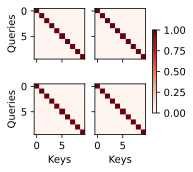

In [3]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
attention_weights = torch.cat((attention_weights,attention_weights),dim=0)
attention_weights = torch.cat((attention_weights,attention_weights),dim=1)
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')